## **Librerías**


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Librerías de clasificación
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Librerias para SVM
from sklearn import svm

# Librerías para Multi-Class
from sklearn.svm import SVC

# Genera datos de ejemplo Regresión logística y Correlación
np.random.seed(0)
X = np.random.rand(100, 2)

# Genera datos de ejemplo para Selección de Características (100 muestras y 10 características)
X_feat, y_feat = make_classification(n_samples=100, n_features=10, random_state=42, flip_y=False)
X_feat = np.abs(X_feat) # Fuerza que no existan carácterísticas negativas

## **Clasificación Simple**

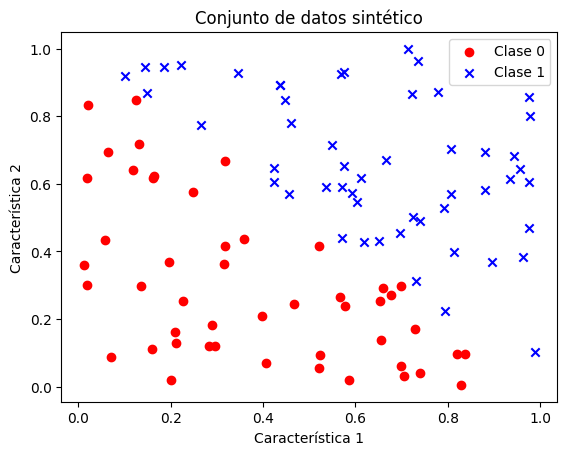

In [ ]:
# Clasificación simple
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Visualiza los datos
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Clase 1')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Conjunto de datos sintético')
plt.show()

## **Regresión Logística**

In [ ]:
# Implementa la regresión logística
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

# Añade una columna de unos a X para el término de sesgo
X = np.hstack((np.ones((X.shape[0], 1)), X))
# print(X)

# Divide los datos en entrenamiento y prueba
X_train, X_test = X[:80], X[80:]
# print(X_train)
# print(X_test)
y_train, y_test = y[:80], y[80:]
# print(y_train)
# print(y_test)

# Crea y entrena el modelo de regresión logística
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la precisión del modelo
accuracy = np.mean(y_pred == y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 95.00%


## **Correlación**
### Correlación de Pearson:
* También conocida como "correlación lineal" o "coeficiente de correlación de Pearson".
* Mide la relación lineal entre dos variables continuas.
* Supone que las variables siguen una [distribución normal](https://www.matematicasonline.es/BachilleratoCCSS/segundo/archivos/distribucion_normal/DISTRIBUCION%20NORMAL.htm) y que la relación entre ellas es lineal.
* Se utiliza comúnmente para medir la relación entre dos variables cuantitativas, como edad y ingresos.
* Los valores van de -1 a 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica ausencia de correlación.

###Correlación de Spearman:

* También conocida como "correlación de rango de Spearman".
* Mide la relación monótona entre dos variables, es decir, si el aumento en una variable se asocia con el aumento o disminución en la otra.
* No requiere que las variables sigan una distribución normal ni que la relación sea lineal.
* Se utiliza cuando las variables son ordinales o no siguen una distribución normal.
* Se calcula mediante la clasificación de los valores de las variables y la comparación de los rangos de los valores.

###Correlación de Kendall:

* También conocida como "tau de Kendall".
* Mide la relación de concordancia o discordancia entre dos variables, es decir, si los pares de observaciones mantienen el mismo orden o no.
* No asume una distribución normal ni una relación lineal y es robusta frente a valores atípicos.
* A menudo se utiliza cuando se tienen datos ordinales o cuando la relación no es necesariamente lineal.
* Se calcula contando los pares de datos que son concordantes y discordantes.

Calcularemos la **Correlación de Pearson** entre dos características presentes en la matriz **X. X[:, 0]** que representa la primera característica, y **X[:, 1]** que representa la segunda característica. Usaremos la función [np.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) que calcula la matriz de correlación entre estas dos características. Se utiliza comúnmente cuando se asume una relación lineal, como en el análisis de regresión, para evaluar la relación entre dos variables cuantitativas.

Correlación de Pearson entre X[:, 0] y X[:, 1]: -0.06834832770642568


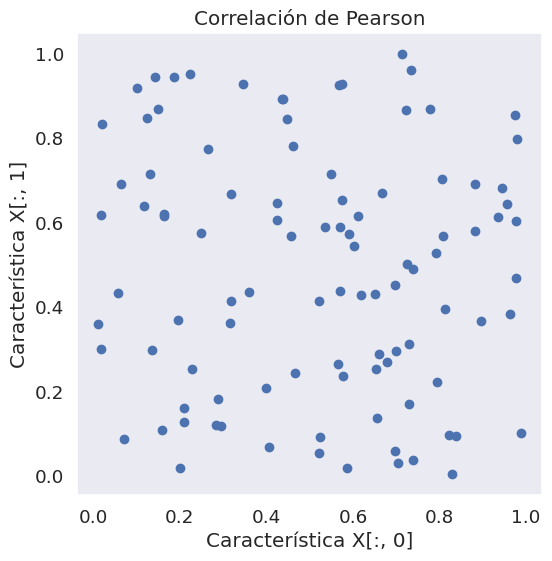

In [ ]:
# Calcula la correlación de Pearson entre las dos características
correlation = np.corrcoef(X[:, 0], X[:, 1])[0, 1]

print("Correlación de Pearson entre X[:, 0] y X[:, 1]:", correlation)
# Anota el valor de correlación y el valor p en el gráfico
# plt.annotate(f'Correlación_X = {correlation:.2f}', xy=(0.5, 0.9))

# Grafica un scatter plot de las dos características
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], label=f'Correlación = {correlation:.2f}')
plt.xlabel('Característica X[:, 0]')
plt.ylabel('Característica X[:, 1]')
plt.title('Correlación de Pearson')

# Anota el valor de correlación y el valor p en el gráfico
# plt.annotate(f'Correlación = {correlation:.2f}', xy=(0.5, 0.9))

plt.grid()
plt.show()

Calcularemos la **Correlación de Spearman** entre dos características presentes en la matriz **X. X[:, 0]** que representa la primera característica, y **X[:, 1]** que representa la segunda característica. La función spearmanr devolverá dos valores: correlation_spearmanr, que es la correlación de Spearman, y p_value, que es el valor p asociado a la prueba de correlación de Spearman. Se utiliza cuando no se asume una relación lineal, como en la comparación de calificaciones de dos pruebas, para evaluar la relación entre variables ordinales o cuando se desea ser menos sensible a valores atípicos.

Correlación de Searmanr entre X[:, 0] y X[:, 1]: -0.08118811881188119


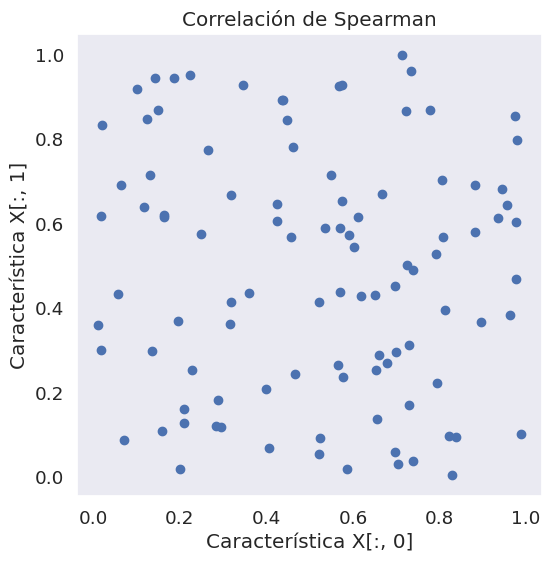

In [ ]:
correlation_spearmanr, p_value = spearmanr(X[:, 0], X[:, 1])

print("Correlación de Searmanr entre X[:, 0] y X[:, 1]:", correlation_spearmanr)

# Grafica un scatter plot de las dos características
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Característica X[:, 0]')
plt.ylabel('Característica X[:, 1]')
plt.title('Correlación de Spearman')

# Anota el valor de correlación y el valor p en el gráfico
# plt.annotate(f'Correlación = {correlation_spearmanr:.2f}', xy=(0.5, 0.9))
# plt.annotate(f'Valor p = {p_value:.4f}', xy=(0.5, 0.85))

plt.grid()
plt.show()


Calcularemos la **Correlación de Kendalltau** entre dos características presentes en la matriz **X. X[:, 0]** que representa la primera característica, y **X[:, 1]** que representa la segunda característica. La función kendalltau devuelve dos valores: correlation_kendalltau, que es la correlación de Kendall Tau, y p_value, que es el valor p asociado a la prueba de correlación de Kendall. Se utiliza en situaciones similares a la de Spearman, pero es especialmente útil cuando se trabaja con datos ordinales o categóricos y cuando se desea una medida robusta ante valores atípicos.

Correlación Tau de Kendall = -0.05
Valor p = 0.4602


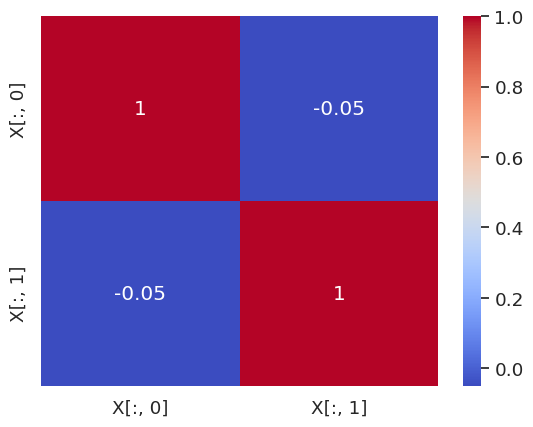

In [ ]:
correlation_kendalltau, p_value = kendalltau(X[:, 0], X[:, 1])
# print("Correlación de Kendalltau entre X[:, 0] y X[:, 1]:", correlation_kendalltau)

# Grafica un scatter plot de las dos características
# plt.figure(figsize=(6, 6))
# plt.scatter(X[:, 0], X[:, 1])
# plt.xlabel('Característica X[:, 0]')
# plt.ylabel('Característica X[:, 1]')
# plt.title('Correlación de Kendall Tau')

# Crea un mapa de calor
labels = ['X[:, 0]', 'X[:, 1]']
correlation_matrix = np.array([[1, correlation_kendalltau],[correlation_kendalltau, 1]])

# Configura el mapa de calor usando seaborn
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)

# Mostrar el valor de correlación y el valor p
print(f'Correlación Tau de Kendall = {correlation_kendalltau:.2f}')
print(f'Valor p = {p_value:.4f}')

plt.grid()
plt.show()

Aplicación de carácterísticas, mediante **SelectKBest** que se utiliza para seleccionar las mejores características de acuerdo con una métrica específica. En este caso, se está utilizando la métrica [chi-cuadrado](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html). **Chi-cuadrado** se utiliza para determinar si existe una relación estadística entre dos variables categóricas en un conjunto de datos. Esta métrica es útil para medir la dependencia entre dos variables y se utiliza comúnmente en el análisis de tablas de contingencia


In [ ]:
# Aplica SelectKBest con la métrica chi-cuadrado para seleccionar las mejores 5 características
k_best = SelectKBest(score_func=chi2, k=5)
X_new = k_best.fit_transform(X_feat, y_feat)
# print(X_new)

# Obtén las características seleccionadas
selected_features = np.where(k_best.get_support())[0]
# print(selected_features)

print("Características originales:", list(range(X_feat.shape[1])))
print("Características seleccionadas:", selected_features)

[[4.76898369e-01 5.21303748e-01 1.25198379e-01 1.48449581e-01
  6.11927193e-01]
 [4.51303037e-01 7.07505698e-01 7.31712082e-02 2.65687975e-01
  3.97667346e-02]
 [5.21064876e-01 1.07961859e+00 1.16940705e+00 5.75787970e-01
  8.13364259e-01]
 [1.51999486e+00 6.84501107e-01 5.54893707e-02 1.71958931e+00
  3.70825001e-01]
 [9.44446256e-01 3.17218215e-01 8.49123046e-01 4.10049693e-01
  7.86327962e-01]
 [6.58552967e-01 1.29802197e+00 3.01549448e-02 5.14233966e-01
  2.69622405e+00]
 [3.09114445e-01 8.07648488e-01 5.77822712e-01 2.33466662e-01
  1.44653470e+00]
 [5.64008535e-01 1.05188010e+00 3.21693913e-01 1.28455230e+00
  2.49720039e+00]
 [1.74235620e+00 1.66069981e+00 4.69537098e-01 1.30324275e+00
  1.15147873e-01]
 [4.26258731e-01 7.81198102e-01 1.94473774e+00 6.76908035e-01
  1.49448454e+00]
 [1.33701560e-01 1.34671751e+00 1.43043530e-01 1.07774381e+00
  6.93773153e-01]
 [2.22605681e-01 1.04797216e+00 1.09140294e-01 9.13079218e-01
  2.84279671e-01]
 [2.65917224e+00 1.18894496e+00 7.659970

Puntuaciones de características:
Característica 1: 0.59
Característica 2: 0.00
Característica 3: 0.68
Característica 4: 0.74
Característica 5: 1.14
Característica 6: 0.85
Característica 7: 0.00
Característica 8: 0.09
Característica 9: 0.02
Característica 10: 0.09

Características seleccionadas (índices): [0 2 3 4 5]


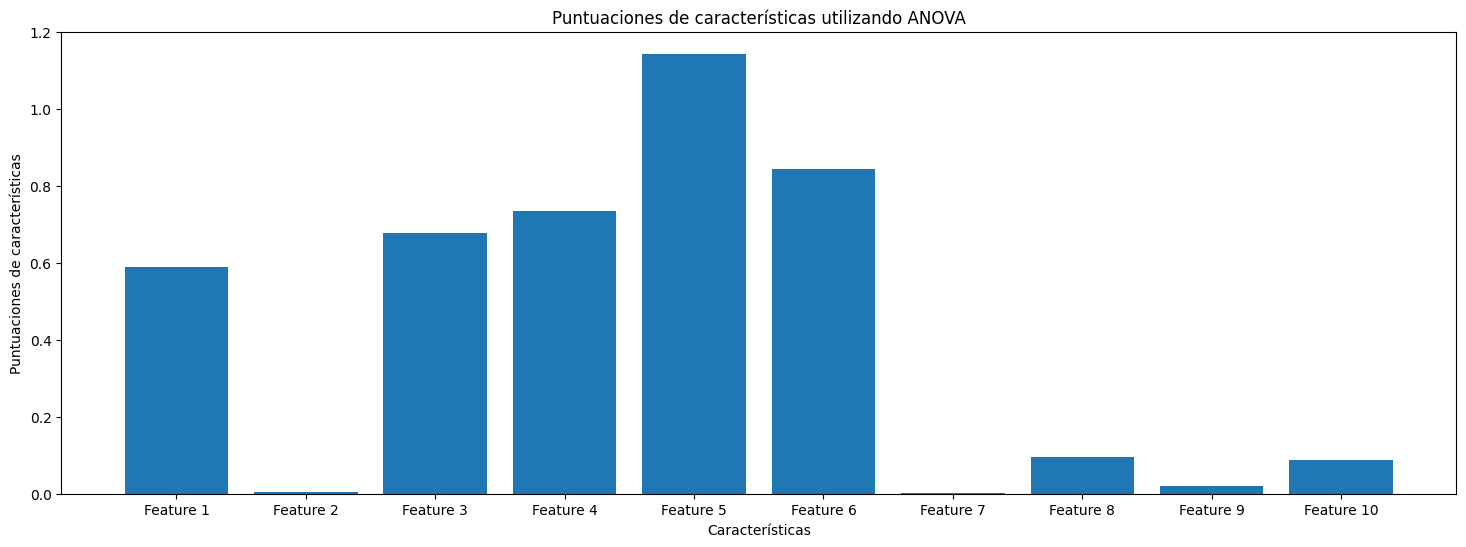

In [ ]:
# Aplica el método de filtro utilizando ANOVA Ref: https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476
num_features_to_select = 5
feature_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_filter = feature_selector.fit_transform(X_feat, y_feat)

# Obtener las puntuaciones de características
feature_scores = feature_selector.scores_

# Obtener las características seleccionadas
selected_feature_indices = feature_selector.get_support(True)

print("Puntuaciones de características:")
for feature, score in enumerate(feature_scores):
    print(f"Característica {feature + 1}: {score:.2f}")

print("\nCaracterísticas seleccionadas (índices):", selected_feature_indices)

# Graficar las puntuaciones de características
plt.figure(figsize=(18, 6))
plt.bar(range(len(feature_scores)), feature_scores, tick_label=[f'Feature {i+1}' for i in range(len(feature_scores))])
plt.xlabel('Características')
plt.ylabel('Puntuaciones de características')
plt.title('Puntuaciones de características utilizando ANOVA')
plt.show()

In [ ]:
# Inicializa el clasificador (puedes usar otros clasificadores según tus necesidades)
classifier = LogisticRegression(solver='liblinear')

# Inicializa RFE para seleccionar 5 características
num_features_to_select = 5
rfe = RFE(estimator=classifier, n_features_to_select=num_features_to_select)

# Ajusta RFE al conjunto de datos
rfe.fit(X_feat, y_feat)

# Obtén las características seleccionadas
selected_feature_indices = rfe.support_
selected_features = [f'Feature {i + 1}' for i, selected in enumerate(selected_feature_indices) if selected]

print("Características seleccionadas:")
for feature in selected_features:
    print(feature)

Características seleccionadas:
Feature 1
Feature 3
Feature 4
Feature 5
Feature 6


In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_feat, y_feat, test_size=0.2, random_state=42)

# Inicializa un clasificador (puedes usar otros clasificadores según tus necesidades)
classifier = LogisticRegression(solver='liblinear')

# Inicializa una lista para almacenar características seleccionadas
selected_features_forward = []
selected_features_backward = list(range(X_train.shape[1]))  # Comenzar con todas las características
selected_features_rfe = None

# Realiza la selección de características con Forward Selection
while len(selected_features_forward) < X_train.shape[1]:
    best_feature = None
    best_accuracy = 0
    for feature in range(X_train.shape[1]):
        if feature in selected_features_forward:
            continue
        features_to_use = selected_features_forward + [feature]
        X_train_subset = X_train[:, features_to_use]
        X_test_subset = X_test[:, features_to_use]
        classifier.fit(X_train_subset, y_train)
        y_pred = classifier.predict(X_test_subset)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature
    if best_feature is not None:
        selected_features_forward.append(best_feature)
    else:
        break

# Realiza la selección de características con Backward Selection
while len(selected_features_backward) > 0:
    worst_feature = None
    worst_accuracy = best_accuracy
    for feature in selected_features_backward:
        features_to_use = selected_features_backward.copy()
        features_to_use.remove(feature)
        X_train_subset = X_train[:, features_to_use]
        X_test_subset = X_test[:, features_to_use]
        classifier.fit(X_train_subset, y_train)
        y_pred = classifier.predict(X_test_subset)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > worst_accuracy:
            worst_accuracy = accuracy
            worst_feature = feature
    if worst_feature is not None:
        selected_features_backward.remove(worst_feature)
    else:
        break

# Realiza la selección de características con Recursive Feature Elimination (RFE)
num_features_to_select = 5
rfe = RFE(estimator=classifier, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)
selected_features_rfe = rfe.support_

# Obtén las características seleccionadas
selected_feature_names_forward = [f'Feature {i + 1}' for i in selected_features_forward]
selected_feature_names_backward = [f'Feature {i + 1}' for i in selected_features_backward]
selected_feature_names_rfe = [f'Feature {i + 1}' for i, selected in enumerate(selected_features_rfe) if selected]

print("Características seleccionadas con Forward Selection:")
for feature in selected_feature_names_forward:
    print(feature)

print("\nCaracterísticas seleccionadas con Backward Selection:")
for feature in selected_feature_names_backward:
    print(feature)

print("\nCaracterísticas seleccionadas con Recursive Feature Elimination (RFE):")
for feature in selected_feature_names_rfe:
    print(feature)

Características seleccionadas con Forward Selection:
Feature 3
Feature 9
Feature 5
Feature 8
Feature 7
Feature 2
Feature 1
Feature 4
Feature 10
Feature 6

Características seleccionadas con Backward Selection:
Feature 4
Feature 6
Feature 8
Feature 10

Características seleccionadas con Recursive Feature Elimination (RFE):
Feature 1
Feature 4
Feature 5
Feature 6
Feature 10


## **Codigo de KNN con Rechazo**

In [ ]:
# Inicializa el clasificador KNN con un valor de k
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Ajusta el modelo a los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcula la precisión del modelo sin rechazo
accuracy = accuracy_score(y_test, y_pred)

# Umbral para el rechazo
umbral_rechazo = 0.5

# Realiza predicciones en el conjunto de prueba con rechazo
y_pred_with_rechazo = []
for i in range(len(X_test)):
    distancias, indices = knn_classifier.kneighbors([X_test[i]], n_neighbors=k)
    promedio_distancias = np.mean(distancias)
    if promedio_distancias <= umbral_rechazo:
        y_pred_with_rechazo.append(y_pred[i])
        y_pred_with_rechazo.append(-1)
    else:
        y_pred_with_rechazo.append(knn_classifier.predict([X_test[i]]))

# Calcula la precisión del modelo con rechazo
y_pred_with_rechazo = np.array(y_pred_with_rechazo)
y_pred_with_rechazo = y_pred_with_rechazo[y_pred_with_rechazo != -1]
accuracy_with_rechazo = accuracy_score(y_test, y_pred_with_rechazo)

print(f"Precisión del modelo KNN sin rechazo: {accuracy:.2f}")
print(f"Precisión del modelo KNN con rechazo (umbral {umbral_rechazo}): {accuracy_with_rechazo:.2f}")

Precisión del modelo KNN sin rechazo: 0.35
Precisión del modelo KNN con rechazo (umbral 0.5): 0.35


## **Codigo de KNN con Distancia**

In [ ]:
# Inicializa el clasificador KNN con un valor de k
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Ajusta el modelo a los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcula la precisión del modelo sin distancia media
accuracy = accuracy_score(y_test, y_pred)

# Umbral para la distancia media
umbral_distancia_media = 0.5

# Realiza predicciones en el conjunto de prueba con distancia media
y_pred_con_distancia_media = []
for i in range(len(X_test)):
    distancias, indices = knn_classifier.kneighbors([X_test[i]], n_neighbors=k)
    promedio_distancias = np.mean(distancias)
    if promedio_distancias <= umbral_distancia_media:
        y_pred_con_distancia_media.append(y_pred[i])
    else:
        y_pred_con_distancia_media.append(1 - y_pred[i])  # Invierte la etiqueta original

# Calcula la precisión del modelo con distancia media
accuracy_con_distancia_media = accuracy_score(y_test, y_pred_con_distancia_media)

print(f"Precisión del modelo KNN sin distancia media: {accuracy:.2f}")
print(f"Precisión del modelo KNN con distancia media (umbral {umbral_distancia_media}): {accuracy_con_distancia_media:.2f}")

Precisión del modelo KNN sin distancia media: 0.35
Precisión del modelo KNN con distancia media (umbral 0.5): 0.65


## **Codigo de KNN con onderación en ejemplos y características**

In [ ]:
# Inicializa el clasificador KNN con un valor de k y peso uniforme
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='uniform')

# Ajusta el modelo a los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calcula la precisión del modelo con peso uniforme
accuracy_uniform = accuracy_score(y_test, y_pred)

# Cambia el peso a distancia inversa (mayor peso a ejemplos cercanos)
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')

# Ajusta el modelo a los datos de entrenamiento con peso de distancia inversa
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba con peso de distancia inversa
y_pred_distance_weighted = knn_classifier.predict(X_test)

# Calcula la precisión del modelo con peso de distancia inversa
accuracy_distance_weighted = accuracy_score(y_test, y_pred_distance_weighted)

print(f"Precisión del modelo KNN con peso uniforme: {accuracy_uniform:.2f}")
print(f"Precisión del modelo KNN con peso de distancia inversa: {accuracy_distance_weighted:.2f}")

Precisión del modelo KNN con peso uniforme: 0.35
Precisión del modelo KNN con peso de distancia inversa: 0.45


## **Support Vector Machine: Linealmente separables**


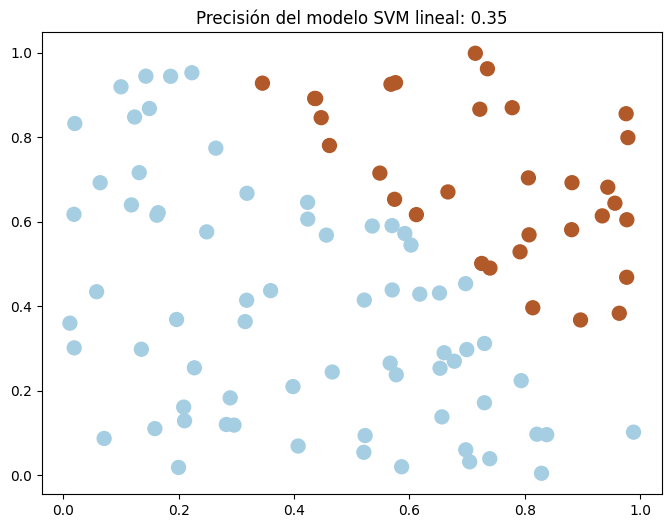

In [ ]:
# Inicializa el clasificador SVM lineal
clf = svm.SVC(kernel='linear')

# Ajusta el modelo a los datos de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = np.mean(y_pred == y_test)

# Visualiza los datos y la superficie de decisión
plt.figure(figsize=(8, 6))

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Dibuja la superficie de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.title(f"Precisión del modelo SVM lineal: {accuracy:.2f}")
plt.show()

## **Support Vector Machine: Regularizacion**

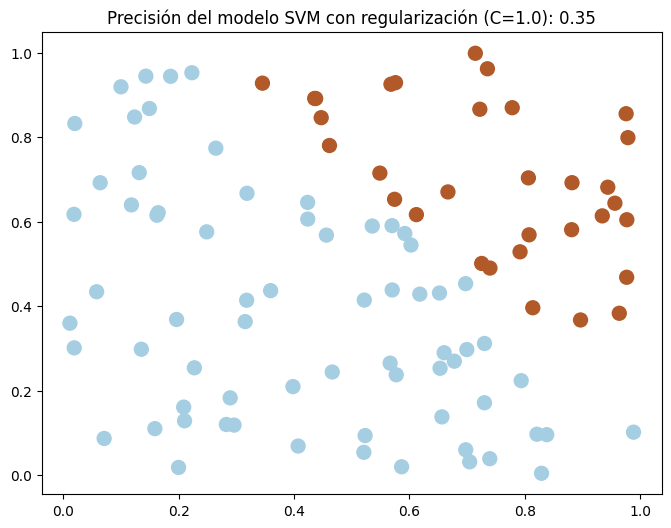

In [ ]:
# Inicializa el clasificador SVM con regularización (parámetro C)
C = 1.0  # Valor de ajuste
clf = svm.SVC(C=C, kernel='linear')

# Ajusta el modelo a los datos de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = np.mean(y_pred == y_test)

# Visualiza los datos y la superficie de decisión
plt.figure(figsize=(8, 6))

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Dibuja la superficie de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.title(f"Precisión del modelo SVM con regularización (C={C}): {accuracy:.2f}")
plt.show()

# Modelos de Clasificación Multi-Clase

Un clasificador OvO (One-Versus-One), también conocido como "uno contra uno", es una técnica de clasificación utilizada en problemas de clasificación multiclase. En lugar de tratar de clasificar directamente múltiples clases, la técnica OvO descompone el problema en múltiples clasificadores binarios. Básicamente, se crea un clasificador binario para cada posible par de clases. Esto significa que si tienes N clases, se generarán N(N-1)/2 clasificadores binarios.

In [60]:
# Crear un clasificador SVM OvO.
# Se creará un clasificador binario para cada par de clases posibles y se realizará una votación para tomar la decisión final.
# Esta es una estrategia común para abordar problemas de clasificación multiclase.
svm_classifier_ovo = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)

# Entrenar el clasificador
svm_classifier_ovo.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier_ovo.predict(X_feat)
print(y_pred)

# Calcular la precisión
accuracy_ovo = accuracy_score(y_feat, y_pred)
print(f'Precisión: {accuracy}')

[1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0]
Precisión: 0.59


Un clasificador OvR (One-Versus-Rest), también conocido como "uno contra el resto" o "uno contra todos", es una técnica de clasificación utilizada en problemas de clasificación multiclase. En lugar de tratar de clasificar directamente múltiples clases, la técnica OvR descompone el problema en múltiples clasificadores binarios. Básicamente, se crea un clasificador binario para cada clase, y cada uno de ellos se entrena para distinguir entre una clase específica y el "resto" de las clases.

In [64]:
# Crear un clasificador SVM OvR
# Se creará un clasificador binario para cada par de clases posibles y se realizará una votación para tomar la decisión final.
# Esta es una estrategia común para abordar problemas de clasificación multiclase.
svm_classifier_ovr = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Entrenar el clasificador
svm_classifier_ovr.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier_ovr.predict(X_feat)
print(y_pred)

# Calcular la precisión
accuracy_ovr = accuracy_score(y_feat, y_pred)
print(f'Precisión: {accuracy}')

[1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0]
Precisión: 0.59


La puntuación F1 en el contexto de machine learning es una métrica de evaluación de clasificación que combina la precisión (precision) y el recall (sensibilidad) en un solo valor. Se utiliza para evaluar el rendimiento de un modelo de clasificación, especialmente en problemas donde el equilibrio entre la precisión y el recall es importante.

In [56]:
# Crear un clasificador de regresión logística para calcular Puntuación F1
logreg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el clasificador
logreg_classifier.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg_classifier.predict(X_feat)

# Calcular el puntaje F1
f1 = f1_score(y_feat, y_pred)
print(f'Puntaje F1: {f1}')

Puntaje F1: 0.5858585858585857


La matriz de confusión es una herramienta esencial en el campo de la evaluación de modelos de clasificación en machine learning. Se utiliza para visualizar el rendimiento de un modelo de clasificación al comparar las predicciones del modelo con los valores reales del conjunto de datos. La matriz de confusión es especialmente útil cuando se trata de problemas de clasificación binaria o multiclase.

La matriz de confusión es una tabla que organiza las predicciones del modelo en cuatro categorías:

1.   **Verdaderos positivos (True Positives, TP)**: Estos son los casos en los que el modelo predice correctamente una instancia como positiva cuando realmente es positiva.
2.   **Falsos positivos (False Positives, FP)**: Estos son los casos en los que el modelo predice incorrectamente una instancia como positiva cuando en realidad es negativa (un error de tipo I).
3.   **Verdaderos negativos (True Negatives, TN)**: Estos son los casos en los que el modelo predice correctamente una instancia como negativa cuando realmente es negativa.
4.  **Falsos negativos (False Negatives, FN)**: Estos son los casos en los que el modelo predice incorrectamente una instancia como negativa cuando en realidad es positiva (un error de tipo II).


|       Clase real      |     Positiva     |     Negativa     |
|-----------------------|------------------|------------------|
| Clase predicha        |        TP        |        FP        |
|-----------------------|------------------|------------------|
|                       |        FN        |        TN        |

In [66]:
# Crear un clasificador de regresión logística
logreg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el clasificador
logreg_classifier.fit(X_feat, y_feat)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg_classifier.predict(X_feat)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_feat, y_pred)
print("Matriz de Confusión:")
print(confusion)

# Calcular otras métricas de evaluación
accuracy = accuracy_score(y_feat, y_pred)
precision = precision_score(y_feat, y_pred)
recall = recall_score(y_feat, y_pred)
f1 = f1_score(y_feat, y_pred)

# Calcular el F1-score macro
f1_macro = f1_score(y_feat, y_pred, average='macro')

# Calcular el F1-score ponderado
f1_weighted = f1_score(y_feat, y_pred, average='weighted')

# Calcular el F1-score micro
f1_micro = f1_score(y_feat, y_pred, average='micro')


print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'Puntaje F1: {f1}')
print(f'F1-score Macro: {f1_macro}')
print(f'F1-score Ponderado: {f1_weighted}')
print(f'F1-score Micro: {f1_micro}')

Matriz de Confusión:
[[30 20]
 [21 29]]
Accuracy Score: 0.59
Precision Score: 0.5918367346938775
Recall Score: 0.58
Puntaje F1: 0.5858585858585857
F1-score Macro: 0.5899589958995899
F1-score Ponderado: 0.58995899589959
F1-score Micro: 0.59
